In [2]:
import json
import pandas as pd
from tqdm import tqdm

def stream_and_filter_json(file_path, target_rows=5000, batch_size=5000, output_csv="/Users/oumaymabamoh/PycharmProjects/arxiv-sci-trend/data/arxiv_subset_sample.csv"):
    valid_rows = 0
    batch = []
    chunks = []

    with open(file_path, 'r') as file, tqdm(total=target_rows) as pbar:
        for line in file:
            try:
                data = json.loads(line.strip())
                # Keep only rows with required fields
                if data.get("title") and data.get("abstract") and data.get("categories"):
                    filtered_row = {
                        "id": data.get("id"),
                        "title": data.get("title"),
                        "abstract": data.get("abstract"),
                        "categories": data.get("categories"),
                        "update_date": data.get("update_date")
                    }
                    batch.append(filtered_row)
                    valid_rows += 1
                    pbar.update(1)
                if len(batch) >= batch_size:
                    df = pd.DataFrame(batch)
                    chunks.append(df)
                    batch = []
                if valid_rows >= target_rows:
                    break
            except json.JSONDecodeError:
                continue

    # Final write
    if batch:
        chunks.append(pd.DataFrame(batch))

    final_df = pd.concat(chunks, ignore_index=True)
    final_df.to_csv(output_csv, index=False)
    print(f"Saved {len(final_df)} valid rows to {output_csv}")

# Run it
stream_and_filter_json("/Users/oumaymabamoh/PycharmProjects/arxiv-sci-trend/data/arxiv-metadata-oai-snapshot.json")

100%|██████████| 5000/5000 [00:00<00:00, 32185.54it/s]


Saved 5000 valid rows to /Users/oumaymabamoh/PycharmProjects/arxiv-sci-trend/data/arxiv_subset_sample.csv


In [3]:
import pandas as pd

# Load the CSV file
df = pd.read_csv("/Users/oumaymabamoh/PycharmProjects/arxiv-sci-trend/data/arxiv_subset_sample.csv")
# Display the first 5 rows
df.head()

,id,title,abstract,categories,update_date
0,704.0001,Calculation of prompt diphoton production cros...,A fully differential calculation in perturba...,hep-ph,2008-11-26
1,704.0002,Sparsity-certifying Graph Decompositions,"We describe a new algorithm, the $(k,\ell)$-...",math.CO cs.CG,2008-12-13
2,704.0003,The evolution of the Earth-Moon system based o...,The evolution of Earth-Moon system is descri...,physics.gen-ph,2008-01-13
3,704.0004,A determinant of Stirling cycle numbers counts...,We show that a determinant of Stirling cycle...,math.CO,2007-05-23
4,704.0005,From dyadic $\Lambda_{\alpha}$ to $\Lambda_{\a...,In this paper we show how to compute the $\L...,math.CA math.FA,2013-10-15


In [4]:
# Display DataFrame info
df.info()

# Display summary statistics for each column (numeric and object types)
df.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           5000 non-null   float64
 1   title        5000 non-null   object 
 2   abstract     5000 non-null   object 
 3   categories   5000 non-null   object 
 4   update_date  5000 non-null   object 
dtypes: float64(1), object(4)
memory usage: 195.4+ KB


,id,title,abstract,categories,update_date
count,5000.000000,5000,5000,5000,5000
unique,NaN,4998,4996,943,854
top,NaN,Metal and molecule cooling in simulations of s...,High resolution molecular line observations ...,astro-ph,2007-05-23
freq,NaN,2,2,915,1159
mean,704.369630,NaN,NaN,NaN,NaN
std,0.355161,NaN,NaN,NaN,NaN
min,704.000100,NaN,NaN,NaN,NaN
25%,704.125075,NaN,NaN,NaN,NaN
50%,704.250050,NaN,NaN,NaN,NaN
75%,704.375025,NaN,NaN,NaN,NaN


In [5]:
import pandas as pd

# Convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['update_date'], errors='coerce')  # Assuming the date column is 'update_date'

# Extract year, month, and day from the 'date' column
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values (count per column):")
print(missing_values)

# Checking for duplicates manually
original_len = len(df)
df_no_duplicates = df.drop_duplicates(subset="id")
duplicates_count = original_len - len(df_no_duplicates)
print(f"Duplicate Rows: {duplicates_count}")

# Drop rows with missing values in selected columns
missing_values_after_cleaning = df.isnull().sum()
print("After Cleaning - Missing Values (count per column):")
print(missing_values_after_cleaning)

# Drop duplicates based on 'id'
df = df.drop_duplicates(subset='id')

# Display a sample of cleaned data
print("Sample of cleaned data:")
df.head()

# Extract the columns after conversion and show sample
df_sample = df[['date', 'year', 'month', 'day']].head()
print(df_sample)


Missing Values (count per column):
id             0
title          0
abstract       0
categories     0
update_date    0
date           0
year           0
month          0
day            0
dtype: int64
Duplicate Rows: 0
After Cleaning - Missing Values (count per column):
id             0
title          0
abstract       0
categories     0
update_date    0
date           0
year           0
month          0
day            0
dtype: int64
Sample of cleaned data:
        date  year  month  day
0 2008-11-26  2008     11   26
1 2008-12-13  2008     12   13
2 2008-01-13  2008      1   13
3 2007-05-23  2007      5   23
4 2013-10-15  2013     10   15


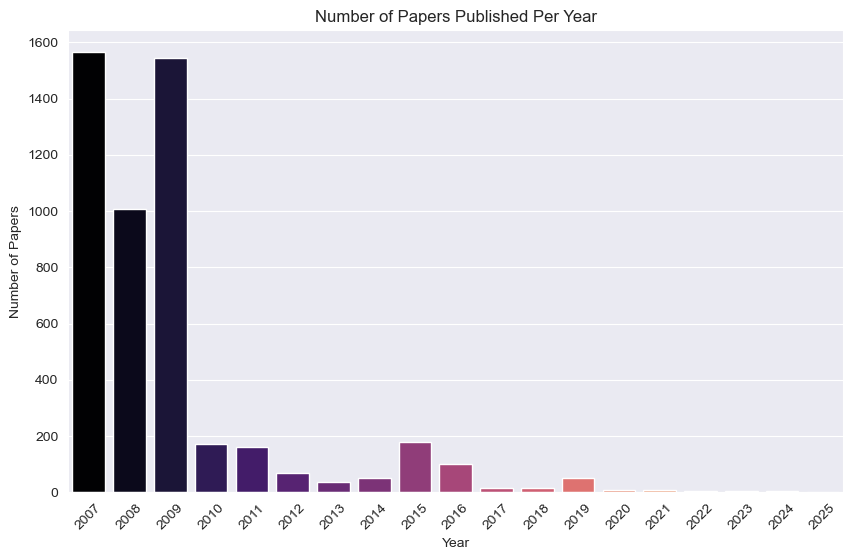

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")

# Filter the 'year' column and drop missing values
year_df = df[['year']].dropna()

# Plot the count of papers per year
plt.figure(figsize=(10, 6))
sns.countplot(data=year_df, x='year', hue='year', palette='magma', legend=False)
plt.title("Number of Papers Published Per Year")
plt.xlabel("Year")
plt.ylabel("Number of Papers")
plt.xticks(rotation=45)
plt.show()

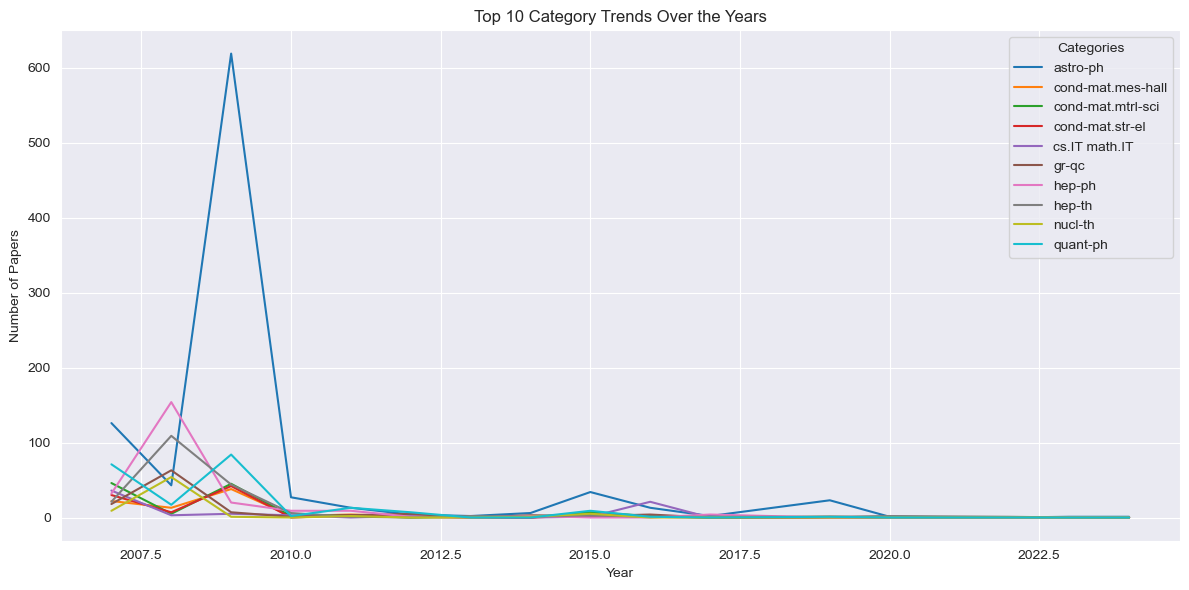

In [7]:
import matplotlib.pyplot as plt

# Step 1: Bring only needed columns into memory as a Pandas DataFrame
df_subset = df[['year', 'categories']].dropna()

# Step 2: Get top 10 categories by total count
top_categories = df_subset['categories'].value_counts().nlargest(10).index

# Step 3: Filter the Pandas DataFrame
filtered_df = df_subset[df_subset['categories'].isin(top_categories)]

# Step 4: Group and pivot
category_year_trend = filtered_df.groupby(['year', 'categories']).size().unstack(fill_value=0)

# Step 5: Plot
category_year_trend.plot(kind='line', figsize=(12, 6))
plt.title("Top 10 Category Trends Over the Years")
plt.xlabel("Year")
plt.ylabel("Number of Papers")
plt.legend(title="Categories")
plt.tight_layout()
plt.show()


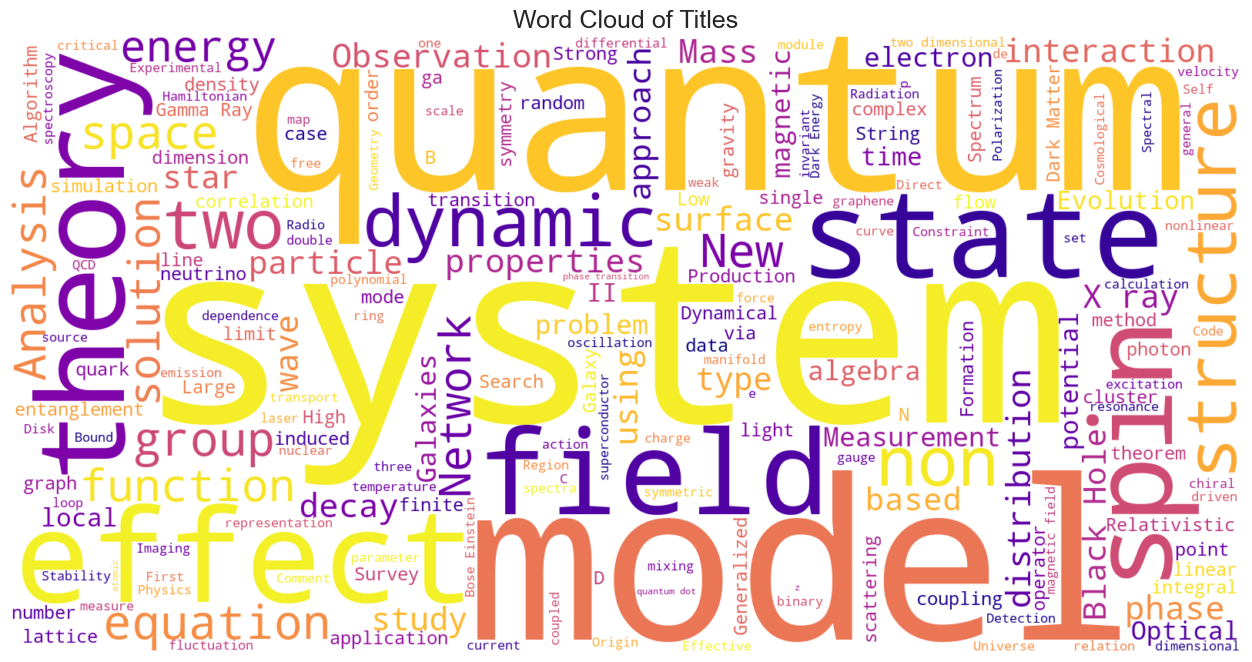

In [8]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Step 1: Convert titles to a single large string
titles_text = ' '.join(df['title'].dropna().astype(str))

# Step 2: Generate word cloud
title_wc = WordCloud(width=1600, height=800, background_color='white', colormap='plasma').generate(titles_text)

# Step 3: Plot
plt.figure(figsize=(16, 8))
plt.imshow(title_wc, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Titles', fontsize=18)
plt.show()

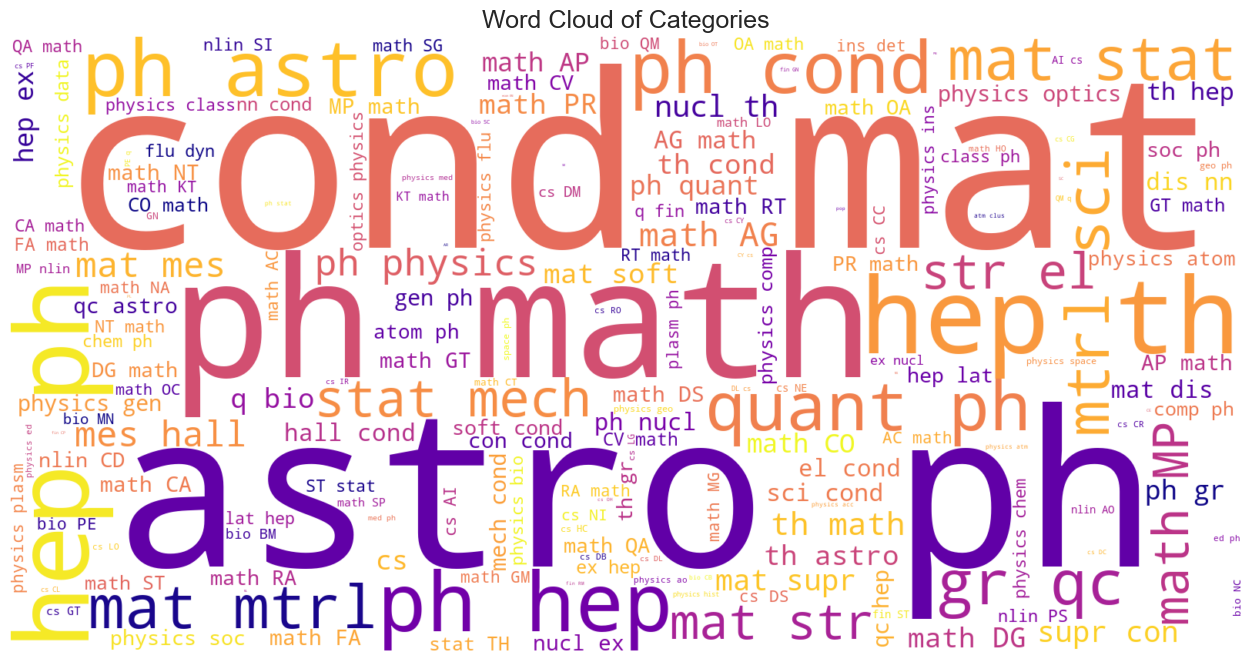

In [9]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Step 1: Convert categories to a single large string
categories_text = ' '.join(df['categories'].dropna().astype(str))

# Step 2: Generate the word cloud
cat_wc = WordCloud(width=1600, height=800, background_color='white', colormap='plasma').generate(categories_text)

# Step 3: Plot
plt.figure(figsize=(16, 8))
plt.imshow(cat_wc, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Categories', fontsize=18)
plt.show()


In [10]:
import pandas as pd
import nltk
import re
from nltk.corpus import stopwords

# Download stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Function to clean LaTeX and apply regex
def clean_and_preprocess(text):
    if not isinstance(text, str):
        return ""
    # Remove LaTeX math: $, $$, \(...\), \[...\]
    text = re.sub(r'\$.*?\$', '', text)
    text = re.sub(r'\\\((.*?)\\\)', '', text)
    text = re.sub(r'\\\[(.*?)\\\]', '', text)
    text = re.sub(r'\\begin\{.*?\}.*?\\end\{.*?\}', '', text, flags=re.DOTALL)

    # Lowercase
    text = text.lower()

    # Remove punctuation/numbers
    text = re.sub(r'[^a-z\s]', '', text)

    # Remove stopwords
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return " ".join(words)

# Apply preprocessing to titles and abstracts with Pandas
df['processed_title'] = df['title'].apply(clean_and_preprocess)
df['processed_abstract'] = df['abstract'].apply(clean_and_preprocess)

# Check the results
df[['title', 'processed_title', 'abstract', 'processed_abstract', 'categories', 'update_date']].head()


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/oumaymabamoh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,title,processed_title,abstract,processed_abstract,categories,update_date
0,Calculation of prompt diphoton production cros...,calculation prompt diphoton production cross s...,A fully differential calculation in perturba...,fully differential calculation perturbative qu...,hep-ph,2008-11-26
1,Sparsity-certifying Graph Decompositions,sparsitycertifying graph decompositions,"We describe a new algorithm, the $(k,\ell)$-...",describe new algorithm pebble game colors use ...,math.CO cs.CG,2008-12-13
2,The evolution of the Earth-Moon system based o...,evolution earthmoon system based dark matter f...,The evolution of Earth-Moon system is descri...,evolution earthmoon system described dark matt...,physics.gen-ph,2008-01-13
3,A determinant of Stirling cycle numbers counts...,determinant stirling cycle numbers counts unla...,We show that a determinant of Stirling cycle...,show determinant stirling cycle numbers counts...,math.CO,2007-05-23
4,From dyadic $\Lambda_{\alpha}$ to $\Lambda_{\a...,dyadic,In this paper we show how to compute the $\L...,paper show compute norm alphage using dyadic g...,math.CA math.FA,2013-10-15


/var/folders/tz/36qz0vtn4rb0h9dh9ghf_dpr0000gp/T/ipykernel_16373/3371804582.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Values', y=df_freq.index[:50], data=df_freq[:50], palette='plasma')


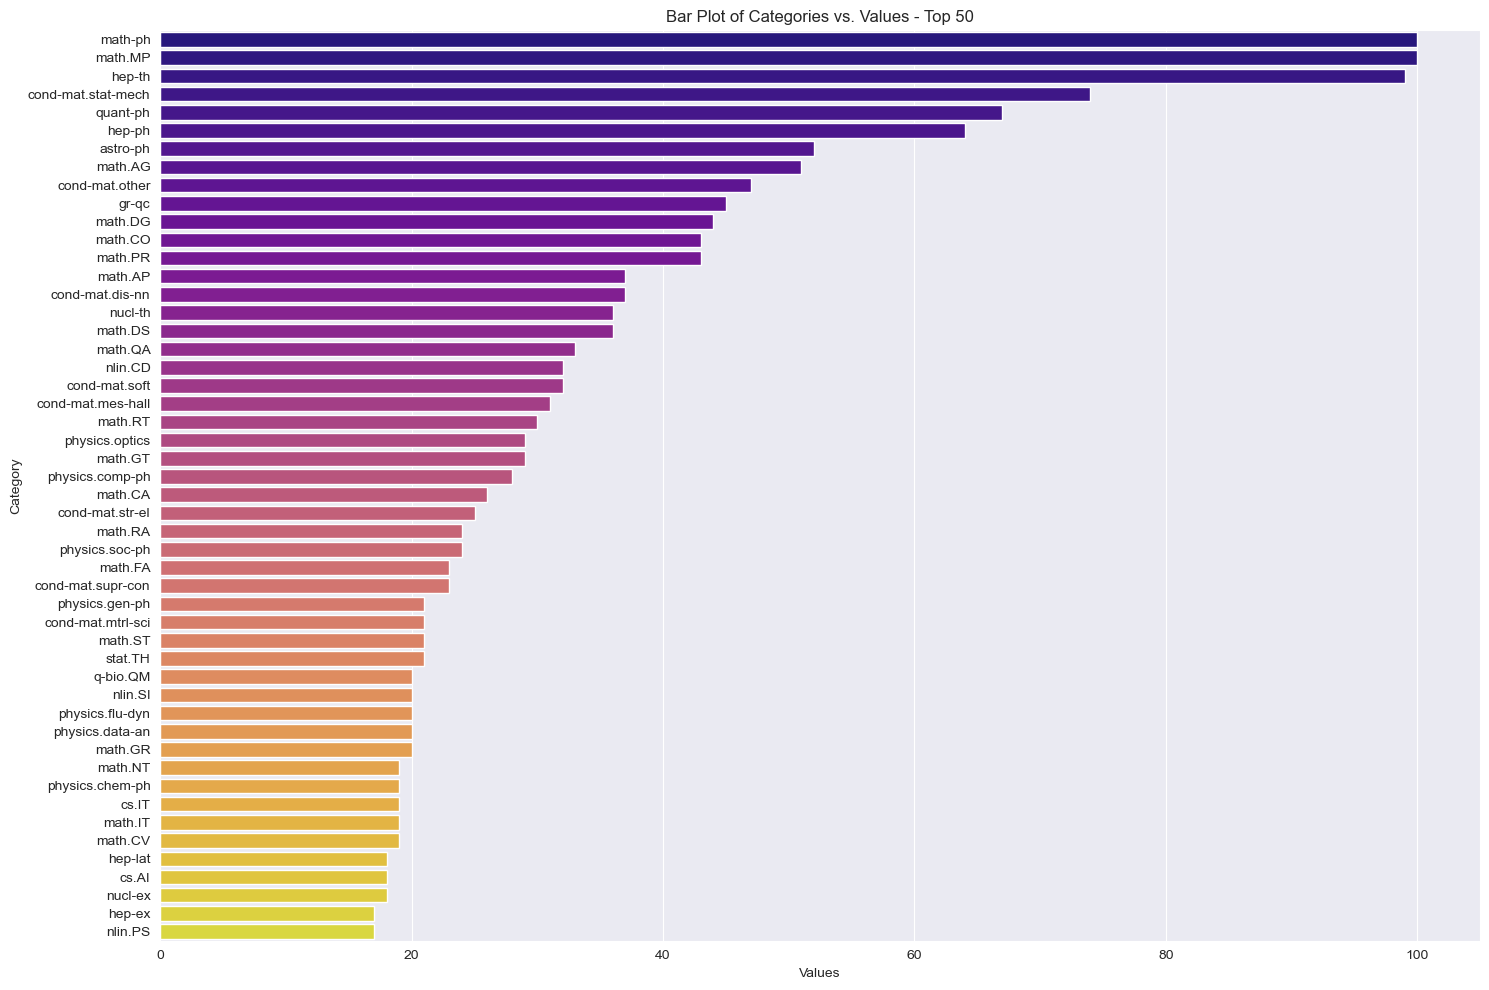

Total of unique categories:  135


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Clean up old garbage
import gc
gc.collect()

####################################
###### Exploring Categories ########
####################################

# Extract unique categories
unique_categories = df['categories'].unique()

unique_set = set()

# Loop through each category and add unique ones to a set
for key in unique_categories:
    for cat in key.split(" "):
        unique_set.add(cat)

# Initialize a dictionary to store category frequencies
dict_cat_freq = {}

# Counting frequency for each category
for key in unique_categories:
    cat_list = key.split(" ")
    for cat in cat_list:
        if cat not in dict_cat_freq:
            dict_cat_freq[cat] = 0
        dict_cat_freq[cat] += 1

# Sort dictionary by frequency (descending)
sorted_categories = dict(sorted(dict_cat_freq.items(), key=lambda item: item[1], reverse=True))

# Convert to DataFrame for easy plotting
df_freq = pd.DataFrame.from_dict(sorted_categories, orient='index', columns=['Values'])

# Set Seaborn style to "whitegrid"
sns.set_style("darkgrid")

# Visualizing the most common categories
plt.figure(figsize=(15, 10))
sns.barplot(x='Values', y=df_freq.index[:50], data=df_freq[:50], palette='plasma')
plt.xlabel('Values')
plt.ylabel('Category')
plt.title('Bar Plot of Categories vs. Values - Top 50')

plt.tight_layout()  # Ensure labels are not cut off
plt.show()

# Print the total number of unique categories
print("Total of unique categories: ", len(unique_set))

In [14]:
import json

# Correct the file path (removed unnecessary space)
from pathlib import Path

# Define the file path
arXiv_categories_file = Path("/Users/oumaymabamoh/PycharmProjects/arxiv-sci-trend/data/arxiv-categories.json")

# Verify that the path is correct
print(f"Loading categories from: {arXiv_categories_file}")

# Load the JSON file
with open(arXiv_categories_file, 'r') as category_json:
    category_list = json.load(category_json)

# Load the JSON file
with open(arXiv_categories_file, 'r') as category_json:
    category_list = json.load(category_json)

# Inspect the first few elements of category_list to ensure the key 'code' exists
# This is important to avoid KeyError
print(json.dumps(category_list[:5], indent=4))  # Show first 5 entries for inspection

# Extract category codes from the JSON (assuming the correct key is 'code')
# If the 'code' key is not found, adjust the key name after inspecting the structure
y = [x.get('code') for x in category_list if 'code' in x]  # Safely accessing 'code'

# Identify deprecated categories
# Assuming 'unique_set' is already defined, if not, you'll need to define it as the set of unique categories in your dataframe
deprecated_cat = unique_set.difference(set(y))

# Check if any of the categories in the list is present in each row's 'categories' column
# Create a boolean mask indicating which rows contain one of the deprecated categories
first_category = df['categories'].str.split().str[0]
num_category = df['categories'].str.split().str.len()

# Apply the mask to filter rows with deprecated categories
mask = first_category.isin(deprecated_cat)

# Filter the DataFrame to get the rows containing the deprecated categories
filtered_df = df[mask]

# Filter rows that contain a deprecated category and have only one category
filtered_df_one_cat = df[mask & (num_category < 2)]

# These are all the categories that are not found in arXiv-categories-YYYY-MM-DD.json
# This affects over 1 million rows! Even if we look for rows which only have 1 category, which is from the deprecated_cat, it still counts over 400K rows.

print(f'There are {len(filtered_df)} rows that contain a deprecated category value.')
print(f'There are {len(filtered_df_one_cat)} rows that contain a deprecated category value and contain only one category.')

# All deprecated_cat values, we will need to resolve these because the missing count is too large to drop, even for single categories with deprecated values.
print("Deprecated categories:", deprecated_cat)

# Cleaning up memory from unused objects
del first_category
del num_category
del mask
del filtered_df
del filtered_df_one_cat

Loading categories from: /Users/oumaymabamoh/PycharmProjects/arxiv-sci-trend/data/arxiv-categories.json
[
    {
        "tag": "cs.AI",
        "name": "Artificial Intelligence"
    },
    {
        "tag": "cs.AR",
        "name": "Hardware Architecture"
    },
    {
        "tag": "cs.CC",
        "name": "Computational Complexity"
    },
    {
        "tag": "cs.CE",
        "name": "Computational Engineering, Finance, and Science"
    },
    {
        "tag": "cs.CG",
        "name": "Computational Geometry"
    }
]
There are 5000 rows that contain a deprecated category value.
There are 3153 rows that contain a deprecated category value and contain only one category.
Deprecated categories: {'physics.ed-ph', 'physics.pop-ph', 'physics.ins-det', 'physics.bio-ph', 'gr-qc', 'cs.DS', 'math.CO', 'physics.plasm-ph', 'cond-mat.dis-nn', 'math.RT', 'physics.hist-ph', 'nlin.SI', 'cs.SC', 'q-bio.GN', 'nucl-th', 'cs.NE', 'math.SG', 'math.LO', 'q-bio.PE', 'physics.atm-clus', 'cs.CR', 'math.FA', 'h

In [15]:
import pandas as pd
import json

# Ensure your DataFrame is correctly loaded (assuming 'categories' column exists)
# Example: df = pd.read_csv("your_data.csv")

# Assuming 'df' is your DataFrame
unique_categories = df['categories'].unique()

# Create a simple dictionary to map categories to sequential numbers starting from 0
category_mapping = {cat: idx for idx, cat in enumerate(unique_categories)}

# Print the mapping
print(category_mapping)

# Step 3: Show the dictionary to verify what the mapping looks like
print("Category Encoding:")
print(category_mapping)

# Step 4: Write the dictionary to a JSON file
# You can adjust the path based on where you want to save the JSON file
with open('/Users/oumaymabamoh/PycharmProjects/arxiv-sci-trend/data/category_encoding.json', 'w') as json_file:
    json.dump(category_mapping, json_file, indent=4)

# Now we have the 'category_encoding.json' file with the mapping
print("Category Encoding has been written to 'category_encoding.json'")

{'hep-ph': 0, 'math.CO cs.CG': 1, 'physics.gen-ph': 2, 'math.CO': 3, 'math.CA math.FA': 4, 'cond-mat.mes-hall': 5, 'gr-qc': 6, 'cond-mat.mtrl-sci': 7, 'astro-ph': 8, 'math.NT math.AG': 9, 'math.NT': 10, 'math.CA math.AT': 11, 'hep-th': 12, 'math.PR math.AG': 13, 'hep-ex': 14, 'nlin.PS physics.chem-ph q-bio.MN': 15, 'math.NA': 16, 'nlin.PS': 17, 'cond-mat.str-el cond-mat.stat-mech': 18, 'math.RA': 19, 'math.CA math.PR': 20, 'cond-mat.str-el': 21, 'physics.optics physics.comp-ph': 22, 'q-bio.PE q-bio.CB quant-ph': 23, 'q-bio.QM q-bio.MN': 24, 'hep-ph hep-lat nucl-th': 25, 'math.OA math.FA': 26, 'math.QA math-ph math.MP': 27, 'physics.gen-ph quant-ph': 28, 'cond-mat.stat-mech cond-mat.mtrl-sci': 29, 'astro-ph nlin.CD physics.plasm-ph physics.space-ph': 30, 'nlin.PS nlin.SI': 31, 'quant-ph cs.IT math.IT': 32, 'cs.NE cs.AI': 33, 'gr-qc astro-ph': 34, 'physics.ed-ph quant-ph': 35, 'math.DG gr-qc': 36, 'cond-mat.soft cond-mat.mtrl-sci': 37, 'physics.pop-ph': 38, 'nucl-th': 39, 'math.FA': 40, 

In [ ]:
import os

# Create directory if it doesn't exist
os.makedirs("/Users/oumaymabamoh/PycharmProjects/arxiv-sci-trend/cleaned_data", exist_ok=True)

# Save cleaned DataFrame
df.to_csv("/Users/oumaymabamoh/PycharmProjects/arxiv-sci-trend/cleaned_data/arxiv_subset_sample_cleaned.csv", index=False)